<a href="https://colab.research.google.com/github/kleber293/calculo_numerico/blob/main/Calculo_Numerico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <div align="center">$\color{#ff6b00}{\text{Conversões}}$</div>

## $\color{#97a100}{\text{Vídeo de apresentação}}$

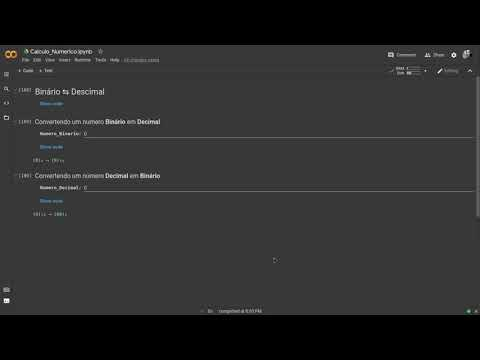

In [ ]:
#@markdown > $\color{gray}{\text{Este vídeo apresenta a função e as suas funcionalidades}}$
from IPython.display import YouTubeVideo
YouTubeVideo('HBa5ATDFg04', width=500, height=333)

## $\color{#97a100}{\text{Binário ⇆ Decimal}}$


### $\color{#00b6ff}{\text{Função}}$

In [ ]:
#@markdown > $\color{gray}{\text{convert_bxd}}$
def convert_bxd(num, bin=False, dec=False):
    
    def saida(v1, b1, v2, b2):
        print(f'(\033[1;32m{v1}\033[){b1}', end='')
        print(' \u27F6 ', end='')
        print(f'(\033[1;32m{v2}\033[){b2}')

    def dec_inteiro(val):
        bn, bnr, val = list(), str(), int(val)
        bn.append(val % 2)
        while True:
            d = val // 2
            if d == 1 or d == 0:
                bn.append(d)
                break
            bn.append(d % 2)
            val = d
        for x in reversed(bn):
            bnr += str(x)
        return bnr

    conf = num
    
    if bin:
        con = True
        for v in str(num):
            con *= v in '10.'
        if bool(con):
            if isinstance(num, float):
                b, sm = str(num).find('.')-1, 0
                for i in str(num).replace('.', ''):
                    sm += int(i)*2**(b)
                    b -= 1
                saida(conf, '\u2082', sm, '\u2081\u2080')
            else:
                c, s = 0, 0
                for n in str(num):
                    c += 1
                    s += int(n)*2**(len(str(num))-c)
                saida(conf, '\u2082', s, '\u2081\u2080')
        else: 
            print('\033[1;31mO valor digitado não é um número Binário!\033[m')

    elif dec:
        if isinstance(num, float):
            bm, st = list(), str()
            cm = 0 if int(num) == 0 else dec_inteiro(num)
            while True:
                if num > 1:
                    num -= int(num)
                num *= 2
                bm.append(num)
                if num % 1 == 0:
                    break
            for x in bm:
                st += f'{str(int(x))}'
            saida(conf, '\u2081\u2080', f'{cm}.{st}', '\u2082')
        else:
            saida(conf,'\u2081\u2080', dec_inteiro(num), '\u2082')

### $\color{#00b6ff}{\text{Convertendo um número Binário em Decimal}}$


In [ ]:
Numero_Binario =  10111#@param
convert_bxd(Numero_Binario, bin=True)

(10111[)₂ ⟶ (23[)₁₀


### $\color{#00b6ff}{\text{Convertendo um número Decimal em Binário}}$


In [ ]:
Numero_Decimal =  13.25#@param
convert_bxd(Numero_Decimal, dec=True)

(13.25[)₁₀ ⟶ (1101.01[)₂


# <div align="center">$\color{#ff6b00}{\text{Resolução numérica de sistemas lineares}}$</div>

## $\color{#97a100}{\text{Métodos Exatos}}$

### $\color{#00b6ff}{\text{Método de Gauss}}$

In [ ]:

#@markdown > $\color{gray}{\text{eliminacao_gauss(hea)}}$

def eliminacao_gauss(hea):
    import numpy as np
    
    arr = np.array(hea, dtype=np.float64, copy=True)
    
    def max_diagonal(arr):
        
        def permutation(arr, shift, end):
            arr = np.insert(arr, end, arr[shift], axis=0)
            finale = shift + 1 if shift > end else shift 
            arr = np.delete(arr, finale, axis=0)
            return arr 

        for i in range(len(arr)):
            arr = permutation(
                arr,
                np.where(arr[i:, i] == max(arr[i:, i], key=abs))[0][0] + i,
                i
            )
        return arr

    arr = max_diagonal(arr)

    for cm in range(len(arr[0])-2): # coluna da linha da matriz
        for l, k in zip(range(cm, len(arr)-1), range(len(arr))): # linha
            for c in range(len(arr[0])): # coluna da linha
                if not c:
                    v1, v2 = arr[cm][cm], arr[cm+k+1][cm]
                arr[cm+k+1][c] = v1*arr[cm+k+1][c]-v2*arr[cm][c]
        arr = max_diagonal(arr)

    return arr        

In [ ]:
matriz_gauss =  [[1, 1, 2, 4], [2, -1, -1, 0], [1, -1, -1, -1]]#@param
#@markdown > $\color{gray}{\text{matriz = eliminacao_gauss(matriz_gauss)}}$
matriz = eliminacao_gauss(matriz_gauss)
print(f'\033[32m{matriz}'); print()
testar_velocidade = False #@param {type:"boolean"}
if testar_velocidade:
    %timeit eliminacao_gauss(matriz_gauss)

[[ 2. -1. -1.  0.]
 [ 0.  3.  5.  8.]
 [ 0.  0.  2.  2.]]



### $\color{#00b6ff}{\text{Matriz resultado do Método de Gauss}}$


In [ ]:
#@markdown > $\color{gray}{\text{resultados(hea)}}$

def resultado(hea):
    '''Entre apenas com uma matriz triangular inferior'''
    import numpy as np
    
    arr = np.array(hea, dtype=np.float64, copy=True); mt = []
    for x in reversed(range(len(arr))):
        n = 0; s = []
        for i, k in zip(range(x+1, len(arr)), range(1, len(arr))):
            s.append(arr[x][i])
            n += s[k-1]*mt[k-1]

        mt.insert(0, (arr[x][len(arr)]-n)/arr.diagonal()[x])

    return mt

In [ ]:
matriz_resultados =  matriz#@param
#@markdown > $\color{gray}{\text{resultado(matriz_resultados)}}$
print(f'\033[32mM = {resultado(matriz_resultados)}\u1D40'); print()
testar_velocidade = False #@param {type:"boolean"}
if testar_velocidade:
    %timeit resultado(matriz_resultados)

M = [1.0, 1.0, 1.0]ᵀ



### $\color{#00b6ff}{\text{Método de Gauss Jordan}}$


In [ ]:
#@markdown > $\color{gray}{\text{gauss_jordan(hea)}}$

def gauss_jordan(hea):

    import numpy as np

    def simple(arr):
        diag = arr.diagonal()
        for i, x in zip(range(len(diag)), diag):
            arr[i] = arr[i]/x
        return arr

    arr = np.array(hea, dtype=np.float64,  copy=True)

    for _ in range(2): 
        bl = []
        for i, k in zip(arr, range(len(arr))):
            if not k-1 < 0:
                bl.append([i[x] for x in range(k)])
        bl = np.hstack(bl)

        if len(np.where(bl > 0)[0]) != 0:
            arr = eliminacao_gauss(arr)
        else:
            break

    for cm in reversed(range(1, len(arr[0])-1)): # coluna da linha da matriz
        for l, k in zip(reversed(range(cm)), range(1, len(arr))): # linha
            for c in range(len(arr[0])): # coluna da linha
                if not c:
                    v1, v2 = arr[cm][cm], arr[cm-k][cm]

                arr[cm-k][c] = v1*arr[cm-k][c]-v2*arr[cm][c]
            simple(arr)
    return arr

In [ ]:
matriz_gauss_jordan = [[1, 1, 2, 4], [2, -1, -1, 0], [1, -1, -1, -1]]#@param
#@markdown > $\color{gray}{\text{gauss_jordan(matriz_gauss_jordan)}}$
arr = gauss_jordan(matriz_gauss_jordan)
print(f'\033[32m{arr}'); print()
testar_velocidade = False #@param {type:"boolean"}
if testar_velocidade:
    %timeit gauss_jordan(matriz_gauss_jordan)

[[1. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]]



## $\color{#97a100}{Métodos Abertos}$

### $\color{#00b6ff}{\text{Critérios de convergência}}$


#### $\color{#0097ff}{\text{Descrição}}$

O processo interativo
$$x^{(k+1)}=Bx^{(k)}+d$$
Converge para a solução $\textbf{se e somente se}$
$$max\{|\lambda_i|\}<1,\qquad\lambda_i\:\text{autovalores de}\:B$$

$\color{gray}{Fonte:}$ [Aqui](https://youtu.be/0KhoP01Ir9g)

#### $\color{#0097ff}{\text{Programa}}$

In [ ]:
#@markdown > $\color{gray}{\text{convergencia(arr)}}$

def convergencia(arr):
    """
        Retorna uma str afirmando ou negando se a matriz converge
    """
    
    def interacao(arr):
        """
            Retorna uma matriz quadrada gerada pelo processo de interação 
        """
        arr = np.array(arr, dtype=np.float64, copy=True)

        if len(arr[0]) == len(arr)+1:
            arr = np.delete(arr, -1, 1)

        for j in range(len(arr)): # colunas
            for i in range(len(arr[0])): #linhas
                if j != i:
                    arr[j][i] = -1*arr[j][i]/arr.diagonal()[j]
            arr[j][j] = 0
        return arr

    # ---------------
    
    import numpy as np

    arr = np.array(arr, dtype=np.float64, copy=True)
    arr = interacao(arr)
    
    if len(arr[0]) == len(arr):
        auto_v = np.linalg.eigvals(arr)
        
        if np.max(abs(auto_v)) < 1:
            msg = '\033[32mA matriz converge\033[' # mensagem em verde
        else:
            msg = '\033[31mA matriz diverge\033[' # mensagem em vermelho
    else:
        msg = f'\033[31mErro! M[{len(arr[0])}][{len(arr)}]\033[' # mensagem de erro em vermelho

    return f'{msg}\n{abs(auto_v)}'

# convergencia([[15, 5, -5, 30], [4, -20, 1, 23], [2, -2, 8, -10]])
# convergencia([[3, 4, -2, 13], [-1, 3, 5, 0], [-4, 4, 2, 2]])

In [ ]:
Matriz_1 = True #@param {type:"boolean"}
if Matriz_1:
    Matriz_01 =  [[2, -1, 1], [1, 2, 3]]#@param
    print(convergencia(Matriz_01))
Matriz_2 = False #@param {type:"boolean"}
if Matriz_2:
    Matriz_02 =  [[1, 1, 2, 4], [2, -1, -1, 0], [1, -1, -1, -1]]#@param
    print(convergencia(Matriz_02))

A matriz converge[
[0.5 0.5]


### $\color{#00b6ff}{\text{Método de Jacobi}}$


In [ ]:
#@markdown > $\color{gray}{\text{m_jacobi(hea, ci=[0, 0, 0], ni=10, tc=2, trc=False, permu=True)}}$

def m_jacobi(hea, ci=[0, 0, 0], ni=10, tc=2, trc=False, permu=True):

    import numpy as np

    def trunc(arr1, arr2, tr=2):
        '''
            Retorna um booleano se arr1 == arr2, para o descimal definido
        '''

        def truncv(values, decs=0):
            values = np.array(values)
            return np.trunc(values*10**decs)/(10**decs)

        arr1, arr2 = truncv(arr1, decs=tr), truncv(arr2, decs=tr)

        comp = np.all([arr1==arr2, [True for _ in range(len(arr1))]]) 
        return comp

    def v(arr, cond, line=0):
        '''
            Retorna uma matriz solução
        '''
        
        def max_diagonal(arr):
                
            def permutation(arr, shift, end):
                arr = np.insert(arr, end, arr[shift], axis=0)
                finale = shift + 1 if shift > end else shift 
                arr = np.delete(arr, finale, axis=0)
                return arr 

            for i in range(len(arr)):
                arr = permutation(
                    arr,
                    np.where(arr[i:, i] == max(arr[i:, i], key=abs))[0][0] + i,
                    i
                )
            return arr
        if permu:
            arr = max_diagonal(arr)

        n, rs = [arr[line][-1]], 0
        n.append(
            [x*i for x, i, c in zip(arr[line], cond, range(len(arr[0])))
            if c != line]
        )
        for k in n[1]:
            rs += k
        x = (n[0]-rs)/arr[line][line]

        return x

    
    ci = [ci]; arr = np.array(hea, dtype=np.float64, copy=True)

    for j in range(ni):
        ci.append([])
        for i in range(len(arr)):
            ci[j+1].append(v(arr, ci[j], line=i))
        
        if trc:
            if trunc(ci[j], ci[j+1], tr=tc):
                break
    
    return ci

In [ ]:
import numpy as np

matriz_m_jacobi = [[2, -1, 1], [1, 2, 3]]#@param
condicoes_iniciais =  [0, 0]#@param
loops = 10 #@param {type:"slider", min:0, max:150, step:1}
trun = False #@param {type:"boolean"}
permutacao = False #@param {type:"boolean"}
truncamento_decimal = 3 #@param {type:"slider", min:1, max:10, step:1}
#@markdown > $\color{gray}{\text{matriz_j = m_jacobi(matriz_m_jacobi, ci=condicoes_iniciais, ni=loops, tc = truncamento_decimal, trc=trun, permu=permutacao)}}$
matriz_j = np.array(m_jacobi(matriz_m_jacobi, ci=condicoes_iniciais, ni=loops, tc = truncamento_decimal, trc=trun, permu=permutacao), dtype=np.float64)
# print(f'\033[32m{matriz_j}'); print()
print(f'\033[32m{matriz_j}'); print()
testar_velocidade = False #@param {type:"boolean"}
if testar_velocidade:
    %timeit m_jacobi(matriz_m_jacobi, ci=condicoes_iniciais, ni=loops, tc = truncamento_decimal, trc=trun, permu=permutacao)

[[0.         0.        ]
 [0.5        1.5       ]
 [1.25       1.25      ]
 [1.125      0.875     ]
 [0.9375     0.9375    ]
 [0.96875    1.03125   ]
 [1.015625   1.015625  ]
 [1.0078125  0.9921875 ]
 [0.99609375 0.99609375]
 [0.99804688 1.00195312]
 [1.00097656 1.00097656]]



### $\color{#00b6ff}{\text{Método de Gauss Seidel}}$


In [ ]:
#@markdown > $\color{gray}{\text{gauss_saidel(hea, ci=[0, 0, 0], ni=10, tc=2, trc=False, permu=True)}}$

def gauss_saidel(hea, ci=[0, 0, 0], ni=10, tc=2, trc=False, permu=True):

    import numpy as np

    def trunc(arr1, arr2, tr=2):
        '''
            Retorna um booleano se arr1 == arr2
        '''

        def truncv(values, decs=0):
            values = np.array(values)
            return np.trunc(values*10**decs)/(10**decs)

        arr1, arr2 = truncv(arr1, decs=tr), truncv(arr2, decs=tr)

        comp = np.all([arr1==arr2, [True for _ in range(len(arr1))]]) 
        return comp

    def v(arr, cond, line=0):
        '''
            Retorna uma matriz solução
        '''
        
        def max_diagonal(arr):
                
            def permutation(arr, shift, end):
                arr = np.insert(arr, end, arr[shift], axis=0)
                finale = shift + 1 if shift > end else shift 
                arr = np.delete(arr, finale, axis=0)
                return arr 

            for i in range(len(arr)):
                arr = permutation(
                    arr,
                    np.where(arr[i:, i] == max(arr[i:, i], key=abs))[0][0] + i,
                    i
                )
            return arr
        if permu:
            arr = max_diagonal(arr)

        n, rs = [arr[line][-1]], 0
        n.append(
            [x*i for x, i, c in zip(arr[line], cond, range(len(arr[0])))
            if c != line]
        )
        for k in n[1]:
            rs += k
        x = (n[0]-rs)/arr[line][line]

        return x

    
    arr = np.array(hea, dtype=np.float64, copy=True)
    hist = np.array([ci], dtype=np.float64, copy=True)

    for j in range(1, ni+1):
        for i in range(len(arr)):
            ci[i] = v(arr, ci, line=i)
        
        hist = np.append(hist, [ci], axis=0)

        if trc:
            if trunc(hist[j-1], hist[j], tr=tc):
                break
    return hist

In [ ]:
import numpy as np

matriz_g_saidel = [[2, -1, 1], [1, 2, 3]]#@param
condicoes_iniciais2 =  [0, 0]#@param
loops2 = 10 #@param {type:"slider", min:0, max:150, step:1}
trun2 = False #@param {type:"boolean"}
permutacao2 = False #@param {type: "boolean"}
truncamento_decimal2 = 3 #@param {type:"slider", min:1, max:10, step:1}
#@markdown > $\color{gray}{\text{matriz_j = gauss_saidel(matriz_g_saidel, ci=condicoes_iniciais2, ni=loops2, tc = truncamento_decimal2, trc=trun2, permu=permutacao2)}}$
matriz_j = np.array(gauss_saidel(matriz_g_saidel, ci=condicoes_iniciais2, ni=loops2, tc = truncamento_decimal2, trc=trun2, permu=permutacao2))
# print(f'\033[32m{matriz_j}'); print()
print(f'\033[32m{matriz_j}'); print()
testar_velocidade = False #@param {type:"boolean"}
if testar_velocidade:
    %timeit gauss_saidel(matriz_g_saidel, ci=condicoes_iniciais2, ni=loops2, tc = truncamento_decimal2, trc=trun2, permu=permutacao2)

[[0.         0.        ]
 [0.5        1.25      ]
 [1.125      0.9375    ]
 [0.96875    1.015625  ]
 [1.0078125  0.99609375]
 [0.99804688 1.00097656]
 [1.00048828 0.99975586]
 [0.99987793 1.00006104]
 [1.00003052 0.99998474]
 [0.99999237 1.00000381]
 [1.00000191 0.99999905]]



# <div align="center">$\color{#ff6b00}{\text{Resolução numérica de equações}}$</div>

REFERÊNCIA


> $\color{gray}{\text{BARROSO, Leônidas Conceição. $\textbf{Cálculo numérico}$. São Paulo: Harper & Row do Brasil, 1983}}$

> $\color{gray}{\text{MÁRCIA, Gomes Ruggiero A. $\textbf{Cálculo numérico}$. Aspectos teóricos e computacionais. São Paulo: Person, 1996}}$

### $\color{#97a100}{\text{Teorema 3.1: Teorema de Bolzano}}$

Se uma função contínua $f(x)$ assume valores de sinais opostos nos pontos extremos do intervalo $[a,\:b]$, isto é $f(a)\cdot f(b)<0$, então o intervalo conterá, no mínimo, uma raiz da equação $f(x)=0$.}

$\color{gray}{\text{BARROSO (1983)}}$

### $\color{#97a100}{\text{Bissecção}}$


#### $\color{#00b6ff}{\text{Descrição 3.4.1}}$

Seja $f(x)$ uma função contínua no intervalo $[a,b]$ e $f(a)\cdot f(b)<0$.


Dividindo o intervalo $[a,b]$ ao meio, obtém-se $x_0$, havendo, pois, dois subintervalos, $[a,x_0]$ e $[x_0,b]$, a ser considerados.


Se $f(x_0)=0$, então $\xi=x_0$; caso contrário, a raiz estará no subintervalo onde a função tem sinais opostos nos pontos extremos, ou seja, se $f(a)\cdot f(x_0)<0$, então $\xi\in(a,x_0)$; senão $f(a)\cdot f(x_0)>0$ e $\xi\in(x_0, b)$.


O novo intervalo $[a_1, b_1]$ que contém $\xi$ é diviidido ao meio e obtém-se o ponto $x_1$. O processo se repete até que se obtenha uma aproximação para a raiz exata $\xi$, com a tolerância $\epsilon$ desejada.


$\color{gray}{\text{BARROSO (1983)}}$

#### $\color{#00b6ff}{Programa}$

In [120]:
#@markdown > $\color{gray}{\text{bisseccao(a, b, n=100, e=0.001)}}$

def bisseccao(a, b, n=100, e=0.001):

    for l in range(n):
        xi = a if l == 0 else x
        x = (a+b)/2
        if f(a) == 0 or f(b) == 0 or abs((x-xi)/x) < e:
            raiz = a if f(a) == 0 else raiz
            raiz = b if f(b) == 0 else raiz
            break

        else:
            a = x if f(x) * f(a) > 0 else a 
            b = x if f(x) * f(b) > 0 else b
            raiz = x

    return (raiz, l, abs((x-xi)/x))

In [121]:
import numpy as np
f = lambda x: np.exp(-x)+x/5-1 #@param

RUM = True #@param {type:"boolean"}
if RUM:
    a =  4#@param {type:"number"}
    b = 6 #@param {type:"number"}
    error = 1e-10 #@param {type:"slider", min:1e-10, max:0.1, step:0.0001}
    loops = 72 #@param {type:"slider", min:1, max:100}
    bissec = bisseccao(a, b, loops, error)
    print(f'\033[32mA raiz encontrada foi \033[34m{bissec[0]}\033[')
    print(f'\033[32mO programa rodou \033[34m{bissec[1]}\033[32m vezes\033[')
    print(f'\033[32mA diferença dos intervalos é \033[34m{bissec[2]}\033[')

PLOTAR_GRAFICO = True #@param {type:"boolean"}
if PLOTAR_GRAFICO:

    import plotly.express as px
    y = np.exp(-x)+x/5-1 #@param
    x = np.linspace(a-a/2, b+b/2)
    fig = px.line()
    print()
    fig.update_layout(width=700,height=500)
    fig.update_yaxes(zeroline=True, zerolinecolor='#000000')
    fig.add_scatter(x=x, y=y, name="f(x)")
    fig.add_scatter(x=[bisseccao(a, b, loops, error)[0]], y=[0], name="raiz")
    fig.show()

TESTE_VELOCIDADE = False #@param {type:"boolean"}
if TESTE_VELOCIDADE:
    %timeit corda(a, b, loops, error)

A raiz encontrada foi 4.965114231221378[
O programa rodou 31 vezes[
A diferença dos intervalos é 9.378662112865781e-11[



### $\color{#97a100}{\text{Corda}}$

#### $\color{#00b6ff}{\text{Descrção 3.5.1}}$

Seja $f(x)$ uma função contínua que tenha derivada segunda com sinal constante no intervalo $[a, b]$, sendo que $f(a)\cdot f(b)<0$ e que existe somente um número $\xi\in[a, b]$ tal que $f(\xi)=0$

No método das cordas, ao invés de se dividir o intervalo $[a, b]$ ao meio, ele é dividido em partes proporcionais à razão $-f(a)/f(b)$

\\

$\frac{h_1}{b-a}=\frac{-f(a)}{-f(a)+f(b)}$

\\

Isto conduz a um valor aproximado da raiz

\\

$x_1=a+h_1$

\\

$x_1=a-\frac{f(a)}{f(b)-f(a)}(b-a)$

\\

Ao se aplicar este procedimento ao novo intervalo que contém $\xi([a, x_1] ou [x_1, b])$, obtém-se uma nova aproximação $x_2$ da raiz


$\color{gray}{\text{BARROSO (1983)}}$

#### $\color{#00b6ff}{Programa}$

In [114]:
#@markdown > $\color{gray}{\text{corda(a, b, n=100, e=0.001)}}$

def corda(a, b, n=100, e=0.001):

    for l in range(n):    
        xi = a if l == 0 else x
        x = a-f(a)*(b-a)/(f(b)-f(a)) 

        if f(a) == 0 or f(b) == 0 or abs((x-xi)/x) < e:
            raiz = a if f(a) == 0 else raiz
            raiz = b if f(b) == 0 else raiz
            break

        else:
            a = x if f(x) * f(a) > 0 else a 
            b = x if f(x) * f(b) > 0 else b
            raiz = x

    return (raiz, l, abs((x-xi)/x))

In [117]:
import numpy as np
f = lambda x: np.exp(-x)+x/5-1 #@param

RUM = True #@param {type:"boolean"}
if RUM:
    a =  4#@param {type:"number"}
    b = 5 #@param {type:"number"}
    error = 0.0001000001 #@param {type:"slider", min:1e-10, max:1e-1, step:0.0001}
    loops = 30 #@param {type:"slider", min:1, max:100}
    cord = corda(a, b, loops, error)
    print(f'\033[32mA raiz encontrada foi \033[34m{cord[0]}\033[')
    print(f'\033[32mO programa rodou \033[34m{cord[1]}\033[32m vezes\033[')
    print(f'\033[32mA diferença dos intervalos é \033[34m{cord[2]}\033[')

PLOTAR_GRAFICO = True #@param {type:"boolean"}
if PLOTAR_GRAFICO:

    import plotly.express as px
    y =  np.exp(-x)+x/5-1#@param
    x = np.linspace(a-a/2, b+b/2)
    fig = px.line()
    print()
    fig.update_layout(width=700,height=500)
    fig.update_yaxes(zeroline=True, zerolinecolor='#000000')
    fig.add_scatter(x=x, y=y, name="f(x)")
    fig.add_scatter(x=[corda(a, b, loops, error)[0]], y=[0], name="raiz")
    fig.show()

TESTE_VELOCIDADE = False #@param {type:"boolean"}
if TESTE_VELOCIDADE:
    %timeit corda(a, b, loops, error)


A raiz encontrada foi 4.965113687178467[
O programa rodou 2 vezes[
A diferença dos intervalos é 1.0961009210323827e-07[



### $\color{#97a100}{\text{Pégaso}}$

#### $\color{#00b6ff}{\text{Descição 3.6.2}}$

Seja $f(x)$ uma função contínua no intervalo $[x_0, x_1]$ e $f(x_0)\cdot f(x_1)<0$. Como existe uma raiz neste intervalo, as sucessivas aproximações $x_2, x_3, x_4,...$ desta raiz podem ser obtidas pela formação de recorrência abaixo:

\\

$x_{n+1}=x_n-\frac{f(x_n)(x_n-x_{n-1})}{f(x_n)-f(x_{n-1})}\qquad n=1, 2, 3, ...$

\\

onde as aproximalções da interação seguinte são escolhas do seguinte modo:

\\

se $f(x_{n+1})\cdot f(x_n)<0$, então $\qquad[x_{n-1},f({x_{n-1}})]$ é trocado por $[x_n, f(x_n)]$

\\

se $f(x_{n+1})\cdot f(x_n)>0$, então $\qquad[x_{n-1},f({x_{n-1}})]$ é trocado por $[x_{n-1}, f(x_{n-1})\cdot f(x_n)/(f(x_n)+f(x_{n+1}))]$

\\

Em ambos os casos, $[x_n, f(x_n)]$ é trocado por $[x_{n+1}, f(x_{n+1})]$ e esta escolha garante que os valores da função usado a cada interação tenha sempre sinais opostos.


A filosofia fo método Pégaso é reduzir o valor $(x_{n-1})$ por um fator $f(x_n)/(f(x_n)+f(x_n+1))$ de modo a evitar a retenção de um ponto, como o ponto $[c,f(c)]$ no método das cordas, e com isto obter um método de convergência mais rápida.


$\color{gray}{\text{BARROSO (1983)}}$

#### $\color{#00b6ff}{Programa}$

In [106]:
#@markdown > $\color{gray}{\text{pegaso(a, b, n=100, e=0.1)}}$

def pegaso(a, b, n=100, e=0.1):
    # a = f(b)/(f(b)+f(b+1))
    x = [
         a,  # .............................. 0
         f(a),  # ........................... 1
         b,  # .............................. 2
         f(b),  # ........................... 3
         b - (f(b)*(b-a)) / (f(b)-f(a)),  # . 4
         f(b - (f(b)*(b-a)) / (f(b)-f(a)))  # 5
    ]
    for l in range(n):

        if x[5] * x[3] < 0:
            x[0] = x[2]
            x[1] = f(x[0])
            
        elif x[5] * x[3] > 0:
            x[1] = (x[1]*x[3])/(x[3]+x[5])

        x[2] = x[4]
        x[3] = f(x[2])
        x[4] = x[2] - (x[3]*(x[2]-x[0]))/(x[3]-x[1])
        x[5] = f(x[4])

        if abs((x[4]-x[2])/x[4]) < e:
            break

    return x[4], l, abs((x[4]-x[2])/x[4])

In [110]:
import numpy as np
f = lambda x: x*np.sin(x) #@param

RUM = True #@param {type:"boolean"}
a =  10 #@param {type:"number"}
b =  14 #@param {type:"number"}
error = 1e-10 #@param {type:"slider", min:1e-10, max:1e-1, step:0.0001}
loops = 48 #@param {type:"slider", min:1, max:100}

if RUM:
    pegas = pegaso(a, b, loops, error)
    print(f'\033[32mA raiz encontrada foi \033[34m{pegas[0]}\033[')
    print(f'\033[32mO programa rodou \033[34m{pegas[1]}\033[32m vezes\033[')
    print(f'\033[32mA diferença dos intervalos é \033[34m{pegas[2]}\033[')

PLOTAR_GRAFICO = True #@param {type:"boolean"}
if PLOTAR_GRAFICO:

    y = x*np.sin(x) #@param
    import plotly.express as px
    x = np.linspace(a-a/2, b+b/2)
    fig = px.line()
    print()
    fig.update_layout(width=700,height=500)
    fig.update_yaxes(zeroline=True, zerolinecolor='#000000')
    fig.add_scatter(x=x, y=y, name="f(x)")
    fig.add_scatter(x=[pegaso(a, b, loops, error)[0]], y=[0], name="raiz")
    fig.show()

TESTE_VELOCIDADE = False #@param {type:"boolean"}
if TESTE_VELOCIDADE:
    %timeit pegaso(a, b, loops, error)

A raiz encontrada foi 12.566370614359172[
O programa rodou 5 vezes[
A diferença dos intervalos é 4.2507759922795294e-12[





### $\color{#97a100}{\text{Newton}}$

#### $\color{#00b6ff}{\text{Descrição 3.7.1}}$

Seja $f(x)$ uma função contínuua no intervalo $[a,b]$ e $\xi$ o seu único zero neste intervalo; as derivadas $f'(x)(f'(x)\neq0)$ e $f''(x)$ devem também ser contínuas. Encontra-se uma aproximação $x_n$ para a raiz $\xi$ e é feita uma expansão em série de Taylor para $f(x)=0$:

\\

$$
f(x)\doteq f(x_n)+f'(x_n)(x-x_n)
$$

\\

$$
f(x_{n+1})\doteq 0 =f(x_n)+f'(x_n)(x_{n+1}-x_n)
$$

\\

$$
\frac{-f(x_n)}{f'(x_n)}=x_{n+1}-x_n
$$

\\

$$
x_{x+1}=x_n-\frac{f(x_n)}{f'(x_n)}\qquad n=0,1,2,...
$$

\\

Onde x_{n+1} é uma aproximação de $\xi$

$\color{gray}{\text{BARROSO (1983)}}$

#### $\color{#00b6ff}{Programa}$

In [16]:
##@markdown > $\color{gray}{\text{newton(a, n=100, e=0.01)}}$
def newton(a, n=100, e=0.01):
    
    df = lambda a, h=e:(f(a + h)-f(a-h))/(2*h)

    for i in range(n):
        x = a if i == 0 else x-f(x)/df(x)
        error = abs(x-er)/x if i != 0 else 1; er = x
        if error <= e:
            break
    
    return x, i, error

In [22]:
import numpy as np
f = lambda x: np.exp(-x)+x/5-1 #@param

RUM = True #@param {type:"boolean"}
if RUM:
    a =  3#@param {type:"number"}
    error = 0.0001000001 #@param {type:"slider", min:1e-10, max:1e-1, step:0.0001}
    loops = 30 #@param {type:"slider", min:1, max:100}
    newto = newton(a, loops, error)
    print(f'\033[32mA raiz encontrada foi \033[34m{newto[0]}\033[')
    print(f'\033[32mO programa rodou \033[34m{newto[1]}\033[32m vezes\033[')
    print(f'\033[32mA diferença dos intervalos é \033[34m{newto[2]}\033[')

PLOTAR_GRAFICO = True #@param {type:"boolean"}
if PLOTAR_GRAFICO:
    b = a+a/2 if a >= 0 else a-a/2
    import plotly.express as px
    x = np.linspace(a-a/2, b+b/2)
    fig = px.line()
    print()
    fig.update_layout(width=700,height=500)
    fig.update_yaxes(zeroline=True, zerolinecolor='#000000')
    fig.add_scatter(x=x, y=f(x), name="f(x)")
    fig.add_scatter(x=[newton(a, loops, error)[0]], y=[0], name="raiz")
    fig.show()

TESTE_VELOCIDADE = False #@param {type:"boolean"}
if TESTE_VELOCIDADE:
    %timeit newton(a, loops, error)

A raiz encontrada foi 4.965114231744277[
O programa rodou 4 vezes[
A diferença dos intervalos é 1.2932556795359997e-08[



10000 loops, best of 5: 35 µs per loop


### $\color{#97a100}{\text{Interação Linear}}$

#### $\color{#00b6ff}{\text{Descrição 3.8.1}}$

Seja $f(x)$ uma função contínua no intervalo $[a, b]$ e $\xi$ um número pertencente a este intervalo tal que $f(\xi)=0$

Por um artifício albébrico pode-se transformar $f(x)=0$ em $x=F(x)$
Onde $F(x)$ é chamada a função de interação

Sendo $x_0$ uma primeira aproximalçao de raiz $\xi$, calcula-se $F(x_0)$. Faz-se então, $x_1=F(x_0);x_2=F(x_1);x_3=F(x_2)$ e assim sucessivamente, ou seja:

\\

$$
x_{n+1} =F(x_n),\qquad n=0, 1, 2, ...
$$

\\

Se a sequencia $\{x_0, x_1, x_2,...\}$ é convergente, isto é, se existe

\\

$$
\lim_{n\rightarrow\infty}x_n=\xi\quad\text{e}\quad F(x)\quad\text{é contínua}
$$

\\

$$
\lim_{n\rightarrow\infty}x_{n+1}=F(\lim_{n\rightarrow\infty}x_n)
$$

\\

$$\xi=F(\xi)$$

\\

Onde $\xi$ é uma raiz de $f(\xi)=0$.

$\color{gray}{\text{BARROSO (1983)}}$

#### $\color{#00b6ff}{Programa}$

In [13]:
#@markdown > $\color{gray}{\text{in_linear(a, b, n=100, e=0.1)}}$
def in_linear(a, n=100, e=0.1):
    for l in range(n):
        raiz = a if l == 0 else g(raiz)
        error = 1 if l == 0 else abs((raiz-r2)/raiz)
        if error < e:
            break
        r2 = raiz
    return raiz, l, error

In [24]:
import numpy as np

f = lambda x: np.exp(x)+x-2 #@param
g = lambda x: np.log(2-x) #@param
x = np.linspace(0, 1.9, 100)

RUM = True #@param {type:"boolean"}
a = 0.5 #@param {type:"number"}
loops = 50 #@param {type:"slider", min:1, max:100}
error = 0.0249000001 #@param {type:"slider", min:1e-10, max:0.1, step:1e-4}

if RUM:
    linear = in_linear(a, loops, error)
    print(f'\033[32mA raiz encontrada foi \033[34m{linear[0]}\033[')
    print(f'\033[32mO programa rodou \033[34m{linear[1]}\033[32m vezes\033[')
    print(f'\033[32mA diferença dos intervalos é \033[34m{linear[2]}\033[')

PLOTAR_GRAFICO = True #@param {type:"boolean"}
if PLOTAR_GRAFICO:
    import plotly.express as px
    fig = px.line()
    print()
    fig.update_layout(width=700,height=500)
    fig.update_yaxes(zeroline=True, zerolinecolor='#000000')
    fig.add_scatter(x=x, y=f(x), name="f(x)")
    fig.add_scatter(x=x, y=g(x), name="g(x)")
    fig.add_scatter(
        x=[in_linear(a, loops, error)[0]],
        y=[f(in_linear(a, loops, error)[0])],
        name="raiz"
    )
    fig.show()
TESTE_VELOCIDADE = False #@param {type:"boolean"}
if TESTE_VELOCIDADE:
    %timeit in_linear(a, loops, error)

A raiz encontrada foi 0.44690601430835464[
O programa rodou 6 vezes[
A diferença dos intervalos é 0.023211509348717654[



### $\color{#97a100}{\text{Secante}}$

#### $\color{#00b6ff}{\text{Descrição}}$

Uma grande desvantagem do método de Newton é a necissidade de obter $f'(x)$ e calcular seu valor numérico a cada iteração.

Uma forma de se contornar este problema é subtituir a derivada $f'(x_k)$ pelo quociente das diferenças:

$ $

$$
f'(x_k)\approx\frac{f(x_k)-f(x_{k-1})}{x_k-x_{k-1}}
$$

$ $

Onde $x_k$ e $x_{k-1}$ são duas aproximações para a raiz.

Neste caso, a função de interação fica

$ $

$$
\psi(x_k)=x_k-\frac{f(x_k)}{\frac{f(x_k)-f(x_{k-1})}{x_k-x_{k-1}}}=x_k-\frac{f(x_k)}{f(x_k)-f(x_{k-1})}(x_k-x_{k-1})
$$

Ou ainda,

$$\psi(x_k)=\frac{x_{k-1}f(x_k)-x_kf(x_{k-1})}{f(x_k)-f(x_{k-1})}$$

$ $ 

Observamos que são necessárias duas aproximações para se iniciar o método.

$\color{gray}{\text{MÁRCIA (1996)}}$

#### $\color{#00b6ff}{Programa}$

In [36]:
#@markdown > $\color{gray}{\text{secante(a, b, n=100, e=0.001)}}$
def secante(a, b, n=100, e=0.1):

    qd = lambda x: (f(b)-f(a))/(b-a)
    
    for i in range(n):
        x = a if i == 0 else x-f(x)/qd(x)
        error = abs(x-er)/x if i != 0 else 1; er = x
        if error <= e:
            break
    
    return x, i, error

In [55]:
import numpy as np

f = lambda x: x*np.sin(x) #@param

RUM = True #@param {type:"boolean"}
a = 3 #@param {type:"number"}
b = 3.15 #@param {type:"number"}
loops = 50 #@param {type:"slider", min:1, max:100}
error = 1e-10 #@param {type:"slider", min:1e-10, max:0.1, step:1e-4}

if RUM:
    secant = secante(a, b, loops, error)
    print(f'\033[32mA raiz encontrada foi \033[34m{secant[0]}\033[')
    print(f'\033[32mO programa rodou \033[34m{secant[1]}\033[32m vezes\033[')
    print(f'\033[32mA diferença dos intervalos é \033[34m{secant[2]}\033[')

PLOTAR_GRAFICO = True #@param {type:"boolean"}
if PLOTAR_GRAFICO:
    raiz = secante(a, b, loops, error)[0]
    incremento = secante(a, b, loops, error)[1]
    import plotly.express as px
    x = np.linspace(raiz-incremento, raiz+incremento, 100)
    fig = px.line()
    print()
    fig.update_layout(width=700,height=500)
    fig.update_yaxes(zeroline=True, zerolinecolor='#000000')
    fig.add_scatter(x=x, y=f(x), name="f(x)")
    fig.add_scatter(
        x=[raiz],
        y=[f(raiz)],
        name="raiz"
    )
    fig.show()
TESTE_VELOCIDADE = False #@param {type:"boolean"}
if TESTE_VELOCIDADE:
    %timeit secante(a, b, loops, error)

A raiz encontrada foi 3.1415926535849055[
O programa rodou 7 vezes[
A diferença dos intervalos é 3.426559984231112e-11[



# <center>$\color{#ff6b00}{\text{Contatos}}$<center>


In [4]:
#@title

%%html

<table style="white-space: nowrap; width: 0px;" border="0" cellspacing="0">
  <tbody>
    <tr>
      <td style="vertical-align: 0px;">
        <img style="border-right: 3px solid #ff6b00; padding-right: 13px; height: 90px;" src="https://i.pinimg.com/280x280_RS/79/42/c4/7942c414d01e7c8f8c179f905a5a86eb.jpg"/></td>
        <td style="white-space: nowrap; font-family: Helvetica, Arial; padding-left: 11px; font-size: 12px; vertical-align: middle; width: 560px;">
        <h1 style="white-space: nowrap; font-size: 14px; color: #ff6b00; line-height: 1; margin: 0 0 8px 0;">
          <b>CLEBSON DOS SANTOS MARQUES</b>
        </h1>

        <span style="color: #808080; data-contrast: none;">
          Estudante do Curso de Licenciatura em F&iacute;sica pela Universidade Estadual Vale do Acara&uacute;<br />
        </span>
        <span style="white-space: nowrap; font-size: 12px; color: #ff6b00; line-height: 1px; margin: 0 0 8px 0;" data-contrast="none">
          <b>Tel.:</b>
        </span>
        <span style="color: #808080; data-contrast: none;">(88) 9 9412 2413
          <br /><a style="color: #808080; data-contrast: none; text-decoration: none;" href="mailto:klebersantosy@gmail.com">klebersantosy@gmail.com</a><br />
          <a style="color: #808080; data-contrast: none; text-decoration: none;" href="http://lattes.cnpq.br/9411163467458250">http://lattes.cnpq.br/9411163467458250</a>
        </span>

        <div style="white-space: nowrap; margin-top: 8px;">
          <a style="white-space: nowrap; display: inline-block;" href="https://api.whatsapp.com/send?phone=558894122413">
            <img style="white-space: nowrap; width: 20px; height: 20px;" src="https://icon-library.com/images/icon-whatsapp-png/icon-whatsapp-png-2.jpg" />
          </a> <a style="white-space: nowrap; display: inline-block;" href="https://t.me/clebson_marques">
            <img style="white-space: nowrap; width: 20px; height: 20px;" src="https://www.freepnglogos.com/uploads/telegram-png/telegram-communications-icons-24.png" />
          </a> <a style="white-space: nowrap; display: inline-block;" href="https://www.passeidireto.com/perfil/371127-klebson-marques/">
            <img style="white-space: nowrap; width: 20px; height: 20px;" src="https://img.utdstc.com/icon/f63/09d/f6309d71c42e9f12c4aaf4800260f4c2ae9637ab4b148c381e8378e80ccce0e6:200" />
          </a> <a style="white-space: nowrap; display: inline-block;" href="https://github.com/kleber293">
            <img style="white-space: nowrap; width: 26px; height: 20px; object-fit: cover;" src="http://pngimg.com/uploads/github/github_PNG69.png" /></a>
        </div>
      </td>
    </tr>
  </tbody>
</table>

,CLEBSON DOS SANTOS MARQUES Estudante do Curso de Licenciatura em Física pela Universidade Estadual Vale do Acaraú Tel.: (88) 9 9412 2413 klebersantosy@gmail.com http://lattes.cnpq.br/9411163467458250
